# Стратегии, основанные на возврате к среднему

Стратегии возврата к среднему, грубо говоря, противополложны по сути к стратегиям моментума. Они подразумевают, что если финансовый инструмент показал себя слишком хорошо, относительно текущего тренда, то то его динамика меняется, и наоборот.

Работая с простой скользящей средней (SMA) в качестве прокси для «пути тренда», стратегия возврата к среднему, скажем, при обменном курсе EUR / USD может быть протестирована на исторических данных аналогично тестированию на истории SMA- и импульса. стратегии. Идея состоит в том, чтобы определить порог расстояния между текущей ценой акции и SMA, который сигнализирует о длинной или короткой позиции.

В качестве источника данных тут посмотрим, во-первых, те данные, которые предлагает Хилпиш в книге (в них все должно быть хорошо, красиво, прибыльно-богато). Потом посмотрим золото. Потом посмотрим пару EURUSDю Ну и из индексов волатильности что-нить можно посмотреть

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from pylab import mpl, plt
import seaborn as sns

In [2]:
raw = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv',
                            index_col=0, parse_dates=True).dropna()

In [3]:
data = pd.DataFrame(raw['GDX'])
data.rename(columns={'GDX': 'price'}, inplace=True)
data['returns'] = np.log(data['price'] / data['price'].shift(1))

# Определеим и расчитаем SMA
SMA = 25
data['SMA'] = data['price'].rolling(SMA).mean()

# Определим порог генерации сигнала
threshold = 3.5

# Рассчитаем расстояние от средней до цены
data['distance'] = data['price'] - data['SMA']


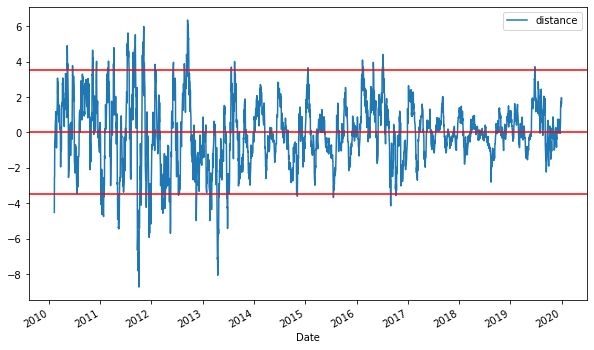

In [4]:
# Построим график полученных растояний
data['distance'].dropna().plot(figsize = (10, 6), legend=True)
plt.axhline(threshold, color='r')
plt.axhline(-threshold, color='r')
plt.axhline(0, color='r')

Рассчитаем открытие позиций

<AxesSubplot:xlabel='Date'>

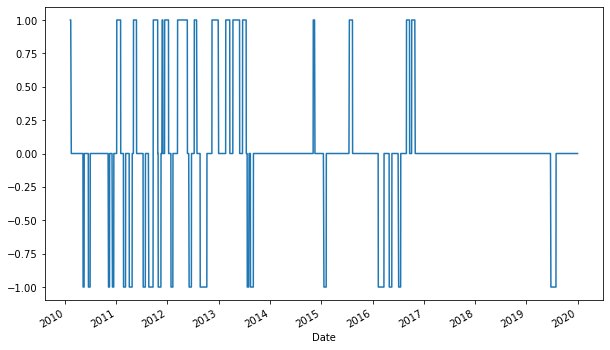

In [5]:
# Если расстояние выше порогового значения - продаем 
# (устанавливаем -1), иначе - NaN
data['position'] = np.where(data['distance'] > threshold,
-1, np.nan) 

# Если расстояние ниже отрицательного порогового значения -
# покупаем (устанавливаем 1), иначе оставляем без изменения
data['position'] = np.where(data['distance'] < -threshold,
1, data['position'])

# При изменении знака значения расстояния переходим к нейтральному
# рынку (устанавливаем 0), в противном случае оставляем значение
# столбца без изменений
data['position'] = np.where(data['distance'] * data['distance'].shift(1) < 0,
0, data['position'])

# Заполняем вперед все позиции NaN предыдущими значениями,
# заменяем все оставшиеся значения NaN на 0
data['position'] = data['position'].ffill().fillna(0) 

# Строим результирующие позиции
data['position'].iloc[SMA:].plot(ylim=[-1.1, 1.1],
figsize=(10,6))

Рассчитаем доходность стратегии

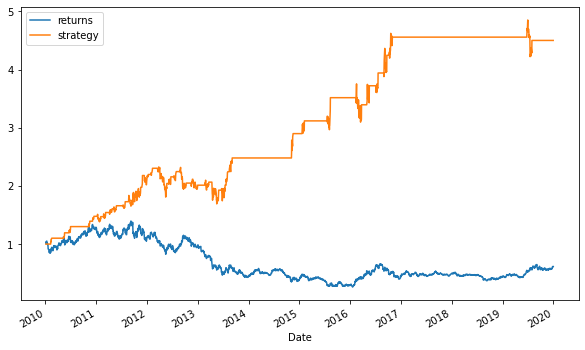

In [6]:
data['strategy'] = data['position'].shift(1) * data['returns']
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10,6));

In [7]:
from Mean_Reversion_Backtesting import MRVectorBacktester as MR

223344


In [8]:
datafile = 'http://hilpisch.com/pyalgo_eikon_eod_data.csv'


In [9]:
mrbt = MR(datafile, 'GLD', '2010-1-1', '2020-12-31', False, 10000, 0.001)

In [10]:
mrbt.run_strategy(SMA=43, threshold=7)

# Залазить на сайт к этому коню и там смотреть код

IndexError: single positional indexer is out-of-bounds